In [147]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [148]:
iris = load_iris(as_frame=True)
df = iris.frame

In [149]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [151]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [152]:
df['target'].value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In [153]:
species_mapper = {
    0:'setosa',
    1:'versicolor',
    2:'virginica'
}

df['species'] = df['target'].map(species_mapper)

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [154]:
cols = df.columns.tolist()
cols

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)',
 'target',
 'species']

In [155]:
col_mapper = {
    'sepal length (cm)':'sepal_length',
    'sepal width (cm)':'sepal_width',
    'petal length (cm)':'petal_length',
    'petal width (cm)':'petal_width',
}

df = df.rename(columns=col_mapper)

df.head()

,sepal_length,sepal_width,petal_length,petal_width,target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [156]:
df['species'].value_counts(normalize=True)

species
setosa        0.333333
versicolor    0.333333
virginica     0.333333
Name: proportion, dtype: float64

In [157]:
df.isna().any().any()

np.False_

In [158]:
df.duplicated().any()

np.True_

In [159]:
num_var = df.select_dtypes(include='number').columns.drop('target').tolist()
num_var

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

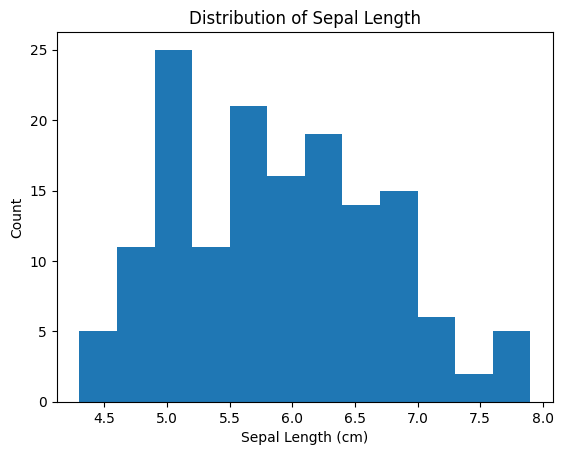

In [160]:
plt.hist(df['sepal_length'], bins=12)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Count')
plt.title('Distribution of Sepal Length')
plt.show()

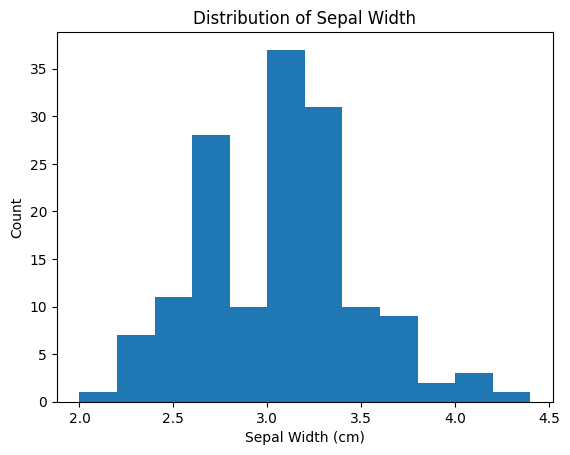

In [161]:
plt.hist(df['sepal_width'], bins=12)
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Count')
plt.title('Distribution of Sepal Width')
plt.show()

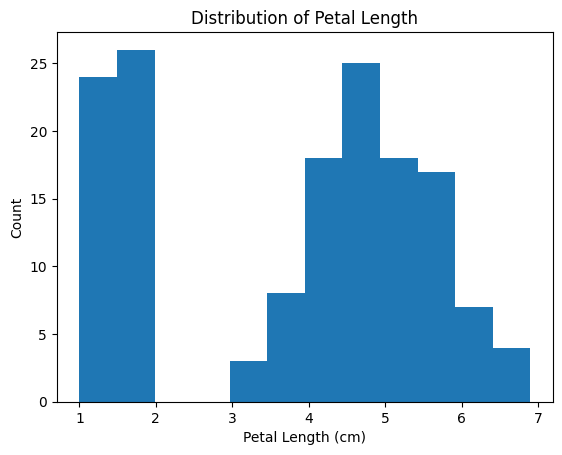

In [162]:
plt.hist(df['petal_length'], bins=12)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Count')
plt.title('Distribution of Petal Length')
plt.show()

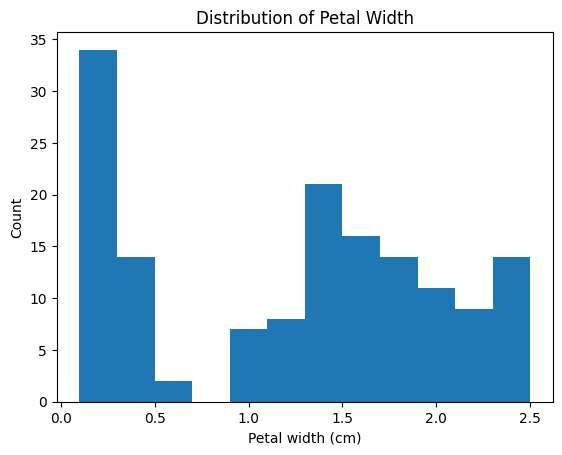

In [163]:
plt.hist(df['petal_width'], bins=12)
plt.xlabel('Petal width (cm)')
plt.ylabel('Count')
plt.title('Distribution of Petal Width')
plt.show()

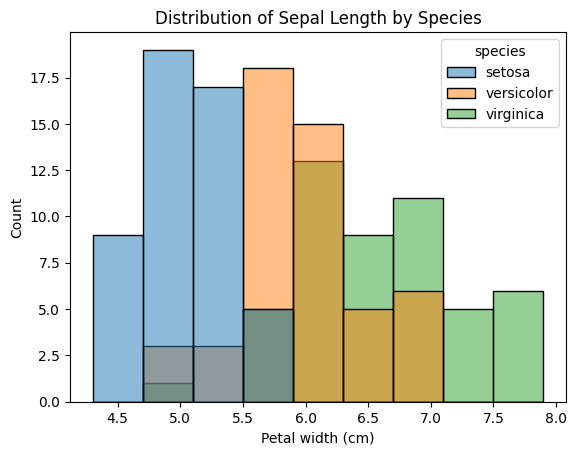

In [164]:
sns.histplot(data=df, x='sepal_length', hue='species')
plt.xlabel('Petal width (cm)')
plt.ylabel('Count')
plt.title('Distribution of Sepal Length by Species')
plt.show()

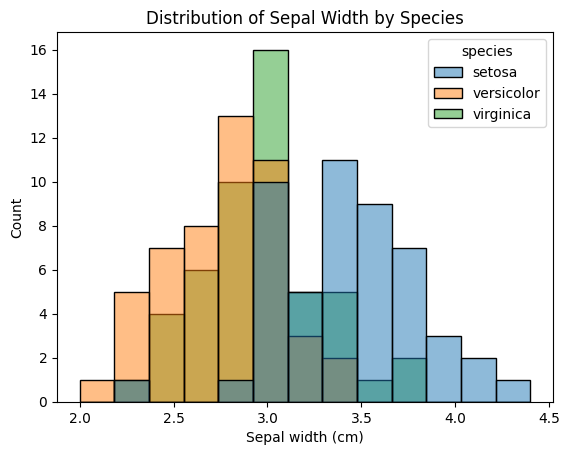

In [165]:
sns.histplot(data=df, x='sepal_width', hue='species')
plt.xlabel('Sepal width (cm)')
plt.ylabel('Count')
plt.title('Distribution of Sepal Width by Species')
plt.show()


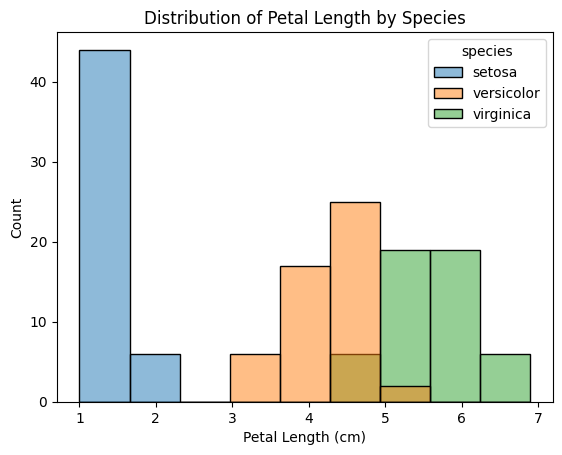

In [166]:
sns.histplot(data=df, x='petal_length', hue='species')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Count')
plt.title('Distribution of Petal Length by Species')
plt.show()

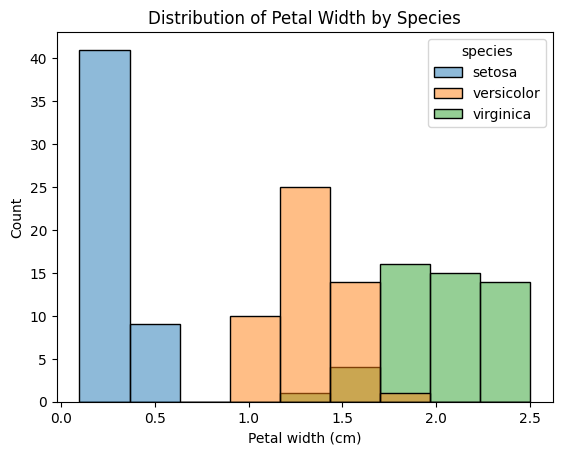

In [167]:
sns.histplot(data=df, x='petal_width', hue='species')
plt.xlabel('Petal width (cm)')
plt.ylabel('Count')
plt.title('Distribution of Petal Width by Species')
plt.show()

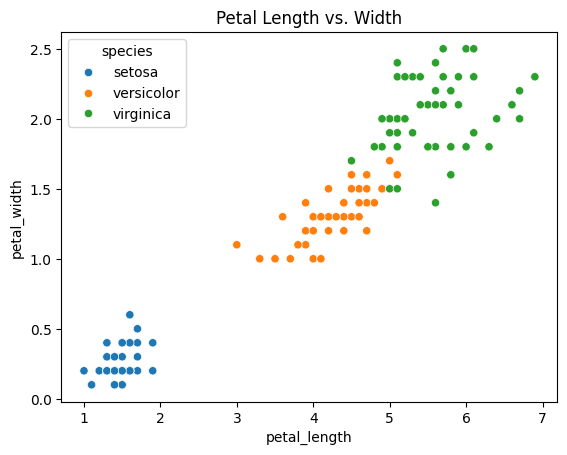

In [168]:
sns.scatterplot(data=df, x='petal_length', y='petal_width', hue='species')
plt.title('Petal Length vs. Width')
plt.show()

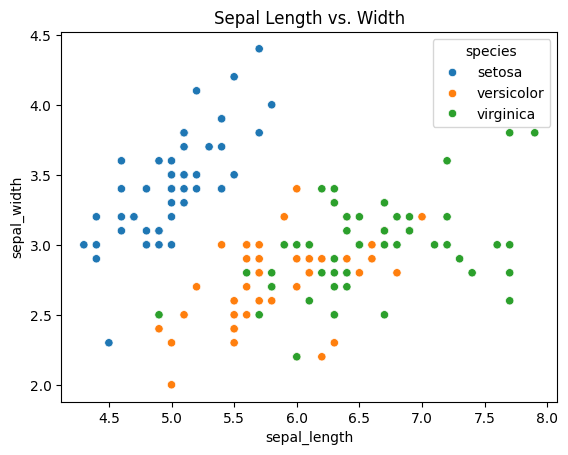

In [169]:
sns.scatterplot(data=df, x='sepal_length', y='sepal_width', hue='species')
plt.title('Sepal Length vs. Width')
plt.show()

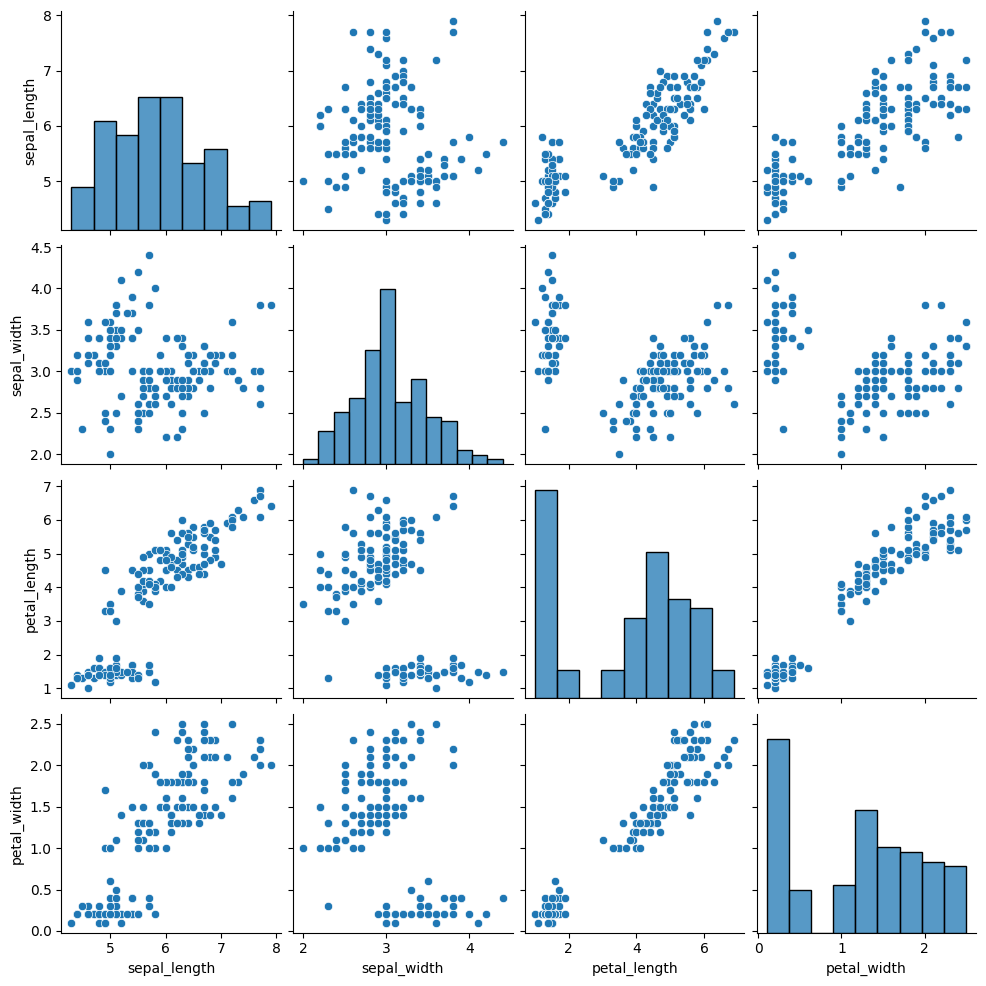

In [170]:
sns.pairplot(df[num_var])
plt.show()

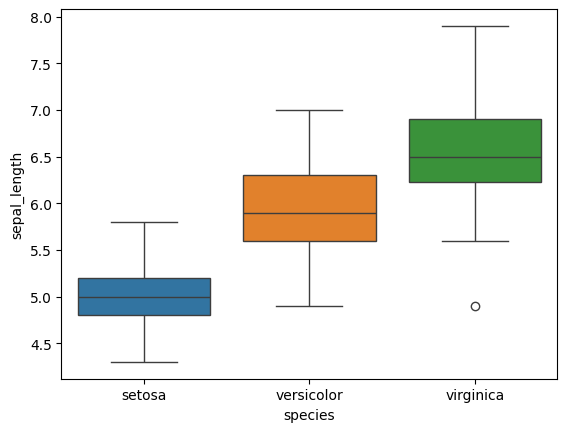

In [187]:
sns.boxplot(data=df, x='species', y='sepal_length', hue='species')
plt.show()


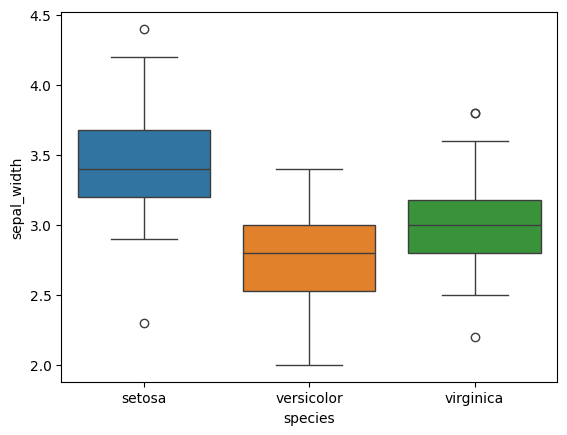

In [188]:
sns.boxplot(data=df, x='species', y='sepal_width', hue='species')
plt.show()

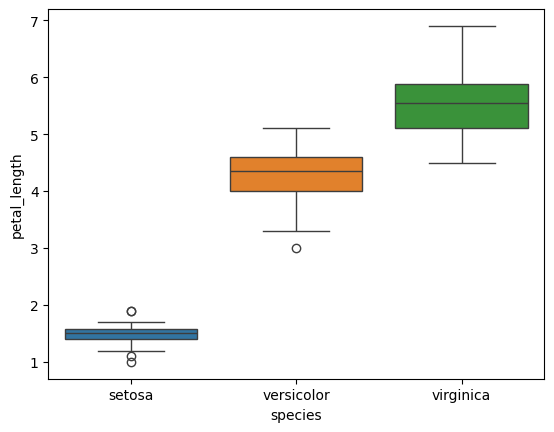

In [190]:
sns.boxplot(data=df, x='species', y='petal_length', hue='species')
plt.show()

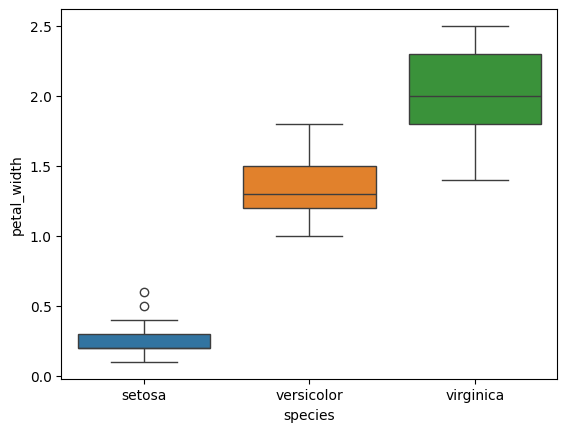

In [189]:
sns.boxplot(data=df, x='species', y='petal_width', hue='species')
plt.show()

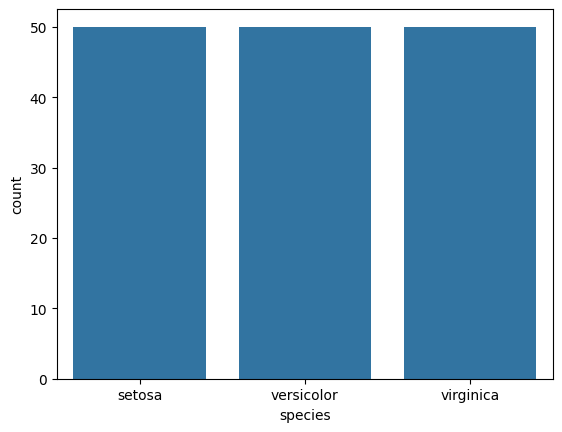

In [172]:
sns.countplot(data=df, x='species')
plt.show()

In [180]:
sl_summary = df.groupby('species')['sepal_length'].agg(['mean','std'])
sl_summary

,mean,std
species,,
setosa,5.006,0.352490
versicolor,5.936,0.516171
virginica,6.588,0.635880


In [181]:
sl_summary['cv'] = sl_summary['std'] / sl_summary['mean']
sl_summary['cv']

species
setosa        0.070413
versicolor    0.086956
virginica     0.096521
Name: cv, dtype: float64

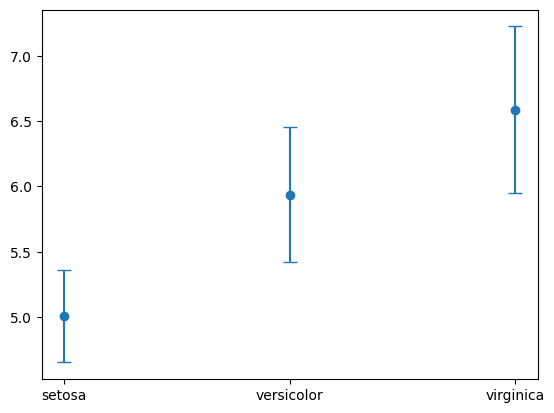

In [203]:
sl_mean = df.groupby('species')['sepal_length'].mean()
sl_std = df.groupby('species')['sepal_length'].std()

plt.errorbar(x=sl_mean.index, y=sl_mean, yerr=sl_std, fmt='o', capsize=5)
plt.show()

In [182]:
sw_summary = df.groupby('species')['sepal_width'].agg(['mean','std'])
sw_summary

,mean,std
species,,
setosa,3.428,0.379064
versicolor,2.770,0.313798
virginica,2.974,0.322497


In [183]:
sw_summary['cv'] = sw_summary['std'] / sw_summary['mean']
sw_summary['cv']

species
setosa        0.110579
versicolor    0.113285
virginica     0.108439
Name: cv, dtype: float64

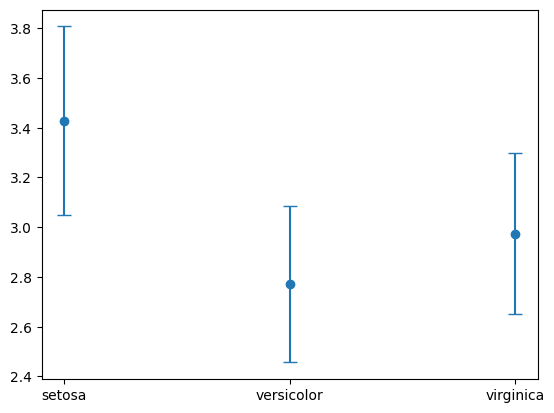

In [204]:
sw_mean = df.groupby('species')['sepal_width'].mean()
sw_std = df.groupby('species')['sepal_width'].std()

plt.errorbar(x=sw_mean.index, y=sw_mean, yerr=sw_std, fmt='o', capsize=5)
plt.show()

In [175]:
pl_summary = df.groupby('species')['petal_length'].agg(['mean','std'])
pl_summary

,mean,std
species,,
setosa,1.462,0.173664
versicolor,4.260,0.469911
virginica,5.552,0.551895


In [176]:
pl_summary['cv'] = pl_summary['std'] / pl_summary['mean']
pl_summary['cv']

species
setosa        0.118785
versicolor    0.110308
virginica     0.099405
Name: cv, dtype: float64

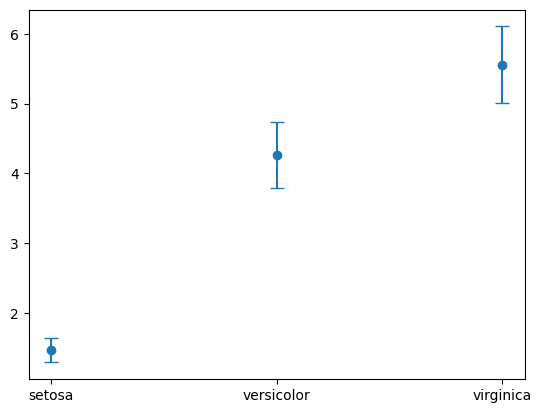

In [206]:
pl_mean = df.groupby('species')['petal_length'].mean()
pl_std = df.groupby('species')['petal_length'].std()

plt.errorbar(x=pl_mean.index, y=pl_mean, yerr=pl_std, fmt='o', capsize=5)
plt.show()

In [177]:
pw_summary = df.groupby('species')['petal_width'].agg(['mean','std'])
pw_summary

,mean,std
species,,
setosa,0.246,0.105386
versicolor,1.326,0.197753
virginica,2.026,0.274650


In [178]:
pw_summary['cv'] = pw_summary['std'] / pw_summary['mean']
pw_summary['cv']

species
setosa        0.428397
versicolor    0.149135
virginica     0.135563
Name: cv, dtype: float64

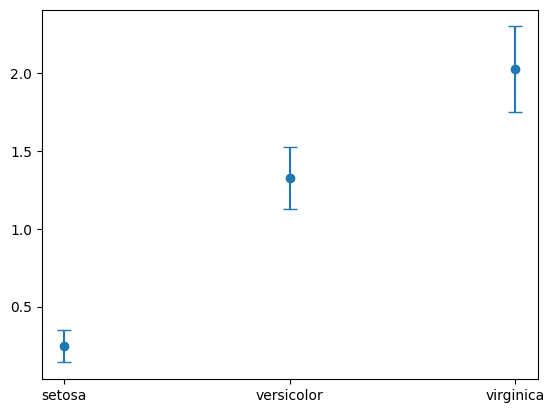

In [207]:
pw_mean = df.groupby('species')['petal_width'].mean()
pw_std = df.groupby('species')['petal_width'].std()

plt.errorbar(x=pw_mean.index, y=pw_mean, yerr=pw_std, fmt='o', capsize=5)
plt.show()

In [209]:
df.groupby('species').describe().T

species                setosa  versicolor  virginica
sepal_length count  50.000000   50.000000  50.000000
             mean    5.006000    5.936000   6.588000
             std     0.352490    0.516171   0.635880
             min     4.300000    4.900000   4.900000
             25%     4.800000    5.600000   6.225000
             50%     5.000000    5.900000   6.500000
             75%     5.200000    6.300000   6.900000
             max     5.800000    7.000000   7.900000
sepal_width  count  50.000000   50.000000  50.000000
             mean    3.428000    2.770000   2.974000
             std     0.379064    0.313798   0.322497
             min     2.300000    2.000000   2.200000
             25%     3.200000    2.525000   2.800000
             50%     3.400000    2.800000   3.000000
             75%     3.675000    3.000000   3.175000
             max     4.400000    3.400000   3.800000
petal_length count  50.000000   50.000000  50.000000
             mean    1.462000    4.260000   5.552000
             std     0.173664    0.469911   0.551895
             min     1.000000    3.000000   4.500000
             25%     1.400000    4.000000   5.100000
             50%     1.500000    4.350000   5.550000
             75%     1.575000    4.600000   5.875000
             max     1.900000    5.100000   6.900000
petal_width  count  50.000000   50.000000  50.000000
             mean    0.246000    1.326000   2.026000
             std     0.105386    0.197753   0.274650
             min     0.100000    1.000000   1.400000
             25%     0.200000    1.200000   1.800000
             50%     0.200000    1.300000   2.000000
             75%     0.300000    1.500000   2.300000
             max     0.600000    1.800000   2.500000
target       count  50.000000   50.000000  50.000000
             mean    0.000000    1.000000   2.000000
             std     0.000000    0.000000   0.000000
             min     0.000000    1.000000   2.000000
             25%     0.000000    1.000000   2.000000
             50%     0.000000    1.000000   2.000000
             75%     0.000000    1.000000   2.000000
             max     0.000000    1.000000   2.000000

In [211]:
df.groupby('species').var(ddof=0)

,sepal_length,sepal_width,petal_length,petal_width,target
species,,,,,
setosa,0.121764,0.140816,0.029556,0.010884,0.0
versicolor,0.261104,0.096500,0.216400,0.038324,0.0
virginica,0.396256,0.101924,0.298496,0.073924,0.0
